In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Missing Values:

In [3]:
data = pd.read_csv('US_Accidents.csv')

In [4]:
data = data.sample(300000)

In [5]:
safe = data

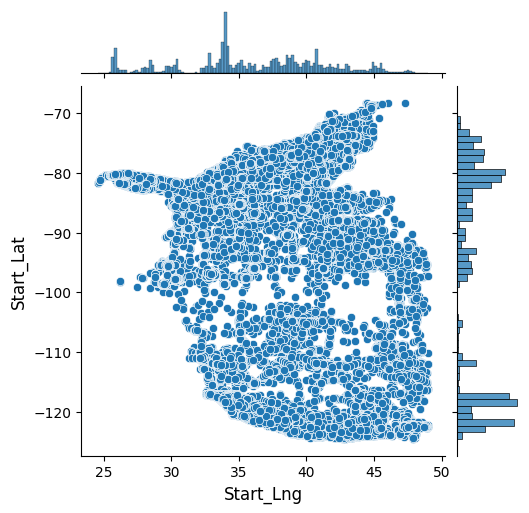

In [6]:
#plt.figure(figsize=[5, 5])
sns.jointplot(x=data.Start_Lat.values,y=data.Start_Lng.values,height=5)
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

In [7]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,1.155900e+05,292601.000000,250236.000000,292181.000000,293644.000000,292430.000000,283202.000000,241887.000000
mean,2.138160,36.238057,-97.130429,36.238139,-97.130262,0.707610,8.200569e+03,61.816193,59.683225,64.437270,29.473013,9.098272,7.405484,0.007226
std,0.479694,5.355915,18.323927,5.355959,18.323722,1.597692,3.376214e+04,18.611217,21.141488,22.859246,1.045189,2.729483,5.446009,0.104719
min,1.000000,24.571310,-124.548074,24.571309,-124.545748,0.000000,1.000000e+00,-89.000000,-89.000000,1.000000,19.240000,0.000000,0.000000,0.000000
25%,2.000000,33.439460,-118.031437,33.440632,-118.031668,0.052000,1.285000e+03,50.000000,46.000000,48.000000,29.310000,10.000000,3.500000,0.000000
50%,2.000000,36.089416,-92.473157,36.089724,-92.470753,0.244000,4.001000e+03,64.000000,63.000000,67.000000,29.820000,10.000000,7.000000,0.000000
75%,2.000000,40.140231,-80.374503,40.140666,-80.375484,0.766000,9.601000e+03,76.000000,76.000000,84.000000,30.010000,10.000000,10.000000,0.000000
max,4.000000,49.000269,-68.264780,48.999132,-68.264780,152.543000,9.999997e+06,120.000000,120.000000,100.000000,58.160000,100.000000,518.000000,24.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 766043 to 32699
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     300000 non-null  object 
 1   Severity               300000 non-null  int64  
 2   Start_Time             300000 non-null  object 
 3   End_Time               300000 non-null  object 
 4   Start_Lat              300000 non-null  float64
 5   Start_Lng              300000 non-null  float64
 6   End_Lat                300000 non-null  float64
 7   End_Lng                300000 non-null  float64
 8   Distance(mi)           300000 non-null  float64
 9   Description            300000 non-null  object 
 10  Number                 115590 non-null  float64
 11  Street                 299999 non-null  object 
 12  Side                   300000 non-null  object 
 13  City                   299989 non-null  object 
 14  County                 300000 no

- lots of missing values

In [9]:
data.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   184410
Street                        1
Side                          0
City                         11
County                        0
State                         0
Zipcode                     160
Country                       0
Timezone                    427
Airport_Code               1050
Weather_Timestamp          5495
Temperature(F)             7399
Wind_Chill(F)             49764
Humidity(%)                7819
Pressure(in)               6356
Visibility(mi)             7570
Wind_Direction             7915
Wind_Speed(mph)           16798
Precipitation(in)         58113
Weather_Condition          7586
Amenity                       0
Bump    

In [10]:
missing_percentages = data.isna().sum().sort_values(ascending=False)/len(data)
missing_percentages

Number                   0.614700
Precipitation(in)        0.193710
Wind_Chill(F)            0.165880
Wind_Speed(mph)          0.055993
Wind_Direction           0.026383
Humidity(%)              0.026063
Weather_Condition        0.025287
Visibility(mi)           0.025233
Temperature(F)           0.024663
Pressure(in)             0.021187
Weather_Timestamp        0.018317
Airport_Code             0.003500
Timezone                 0.001423
Nautical_Twilight        0.000950
Civil_Twilight           0.000950
Sunrise_Sunset           0.000950
Astronomical_Twilight    0.000950
Zipcode                  0.000533
City                     0.000037
Street                   0.000003
Country                  0.000000
Junction                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station       

In [11]:
missing_percentages[missing_percentages != 0].keys()

Index(['Number', 'Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)',
       'Wind_Direction', 'Humidity(%)', 'Weather_Condition', 'Visibility(mi)',
       'Temperature(F)', 'Pressure(in)', 'Weather_Timestamp', 'Airport_Code',
       'Timezone', 'Nautical_Twilight', 'Civil_Twilight', 'Sunrise_Sunset',
       'Astronomical_Twilight', 'Zipcode', 'City', 'Street'],
      dtype='object')

- i dont want these features: Drop

In [12]:
data = data.drop(['Number','Wind_Chill(F)','ID','Description'], axis=1)

- Filling Missing Value and Droping UseLess Features

In [13]:
data['City'] = data['City'].fillna(method='ffill')
data['Weather_Condition'] = data['Weather_Condition'].fillna(method='ffill')
data['Wind_Direction'] = data['Wind_Direction'].fillna(method='ffill')
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(method='ffill')
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(method='ffill')
data['Pressure(in)']=data['Pressure(in)'].fillna(method='ffill')
data['Humidity(%)']=data['Humidity(%)'].fillna(method='ffill')
data['Temperature(F)']=data['Temperature(F)'].fillna(method='bfill')
data['Weather_Timestamp']= data['Weather_Timestamp'].fillna(method='bfill')

- what is this? 
 - is it ok?
 

In [14]:
data['Precipitation_NA'] = 0
data.loc[data['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
data['Precipitation(in)'] = data['Precipitation(in)'].fillna(data['Precipitation(in)'].median())

- just another way to show missing values

In [15]:
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / data.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
8,Street,0.000333
13,Zipcode,0.053333
15,Timezone,0.142333
16,Airport_Code,0.350000
39,Sunrise_Sunset,0.095000
40,Civil_Twilight,0.095000
41,Nautical_Twilight,0.095000
42,Astronomical_Twilight,0.095000


In [16]:
data.drop(['Timezone', 'Airport_Code'], inplace = True, axis = 1)

In [17]:
data.shape

(300000, 42)

In [18]:
data = data.dropna()

In [19]:
data.shape

(299557, 42)

## Feature Engineering

In [27]:
data.Start_Time

766043               2021-11-17 12:37:30
2302488              2020-01-16 12:45:57
729430     2021-11-30 07:42:42.000000000
1930369              2020-12-15 15:19:00
1358089              2021-06-14 14:32:05
                       ...              
2657179              2018-05-21 11:27:54
199116               2017-06-06 17:08:43
2300864              2020-01-14 17:31:00
1601432              2021-02-19 18:11:00
32699                2016-12-04 21:24:33
Name: Start_Time, Length: 299557, dtype: object

In [58]:
data['Time'] = pd.to_datetime(data.Start_Time,)
#data['End_time'] = pd.to_datetime(data.End_Time)

data['Day']= data.Time.apply(lambda x: x.day)
data['Hour']= data.Time.apply(lambda x : x.hour)


<AxesSubplot: xlabel='Hour', ylabel='Count'>

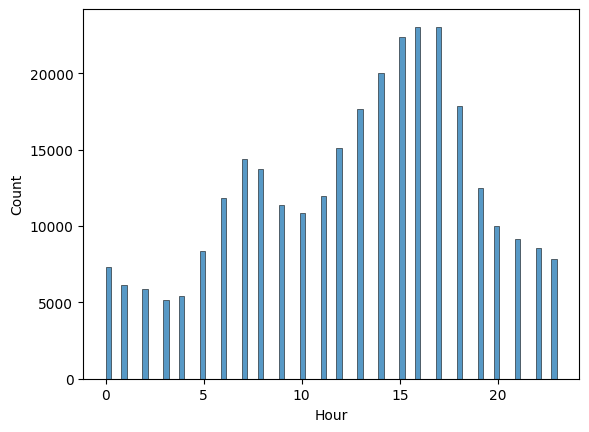

In [80]:
sns.histplot(data['Hour'])

<AxesSubplot: xlabel='Day', ylabel='Count'>

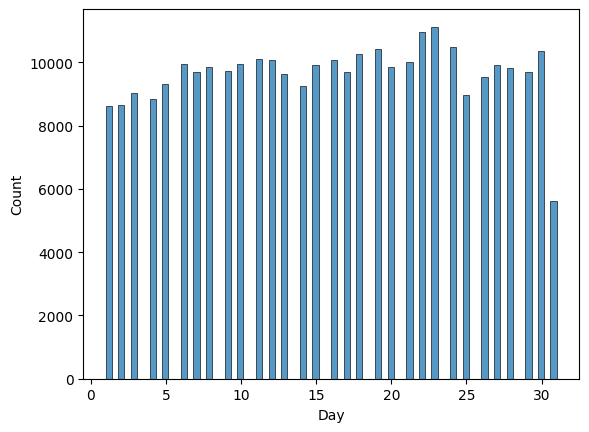

In [83]:
sns.histplot(data['Day'])

(array([  2776.,      0.,      0., 266510.,      0.,      0.,  16468.,
             0.,      0.,  13803.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

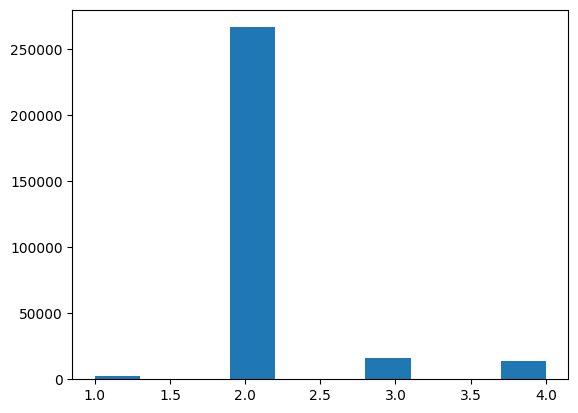

In [90]:
import matplotlib.pyplot as plt
plt.hist(data.Severity)

In [99]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Precipitation_NA', 'Start_time', 'End_time', 'newtime', 'Time', 'Day',
       'Hour'],
      dtype='object')

In [124]:
pred_cols = ['Severity', 'Start_Lat','End_Lat','Start_Lng','End_Lat','Distance(mi)', 'Day','Hour','Pressure(in)', 'Visibility(mi)','Weather_Condition', 'Wind_Speed(mph)', 'Precipitation(in)']
data2= data[pred_cols]

In [125]:
from sklearn.preprocessing import LabelEncoder

# Function for Label Encoding
def label_encode(df, columns):
    le = LabelEncoder()
    df_encoded = df.copy()
    for col in columns:
        df_encoded[col] = le.fit_transform(df[col])
    return df_encoded

In [128]:
data2 = label_encode(data2, ['Weather_Condition'])

In [133]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def oversample_smote(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)
    return df_resampled
    # Function for Random Under-Sampling
def undersample_random(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)

    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column])], axis=1)
    return df_resampled

In [134]:
df_oversampled = oversample_smote(data2, 'Severity')


(array([266510.,      0.,      0., 266510.,      0.,      0., 266510.,
             0.,      0., 266510.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

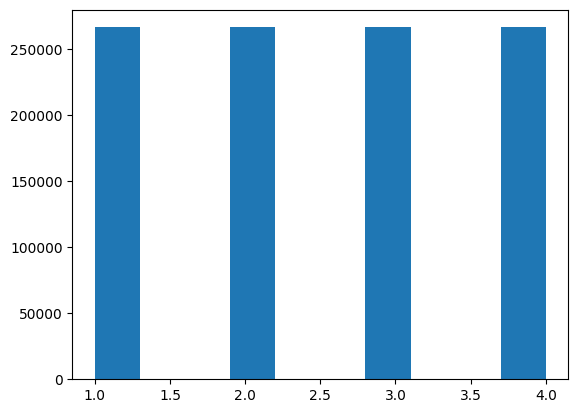

In [135]:
import matplotlib.pyplot as plt
plt.hist(df_oversampled.Severity)

In [137]:
df_undersample= undersample_random(data2, 'Severity')


(array([2776.,    0.,    0., 2776.,    0.,    0., 2776.,    0.,    0.,
        2776.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

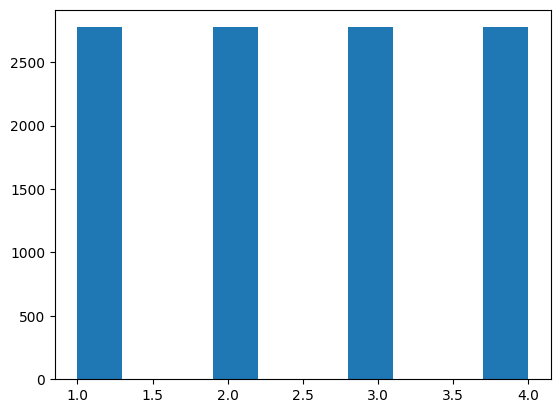

In [138]:
plt.hist(df_undersample.Severity)